In [1]:
import cv2
import numpy as np


cap = cv2.VideoCapture(0)

# Blue Green Yellow
penColorHSV = [[86, 121, 205, 111, 245, 255],
               [46, 78, 204, 71, 255, 255],
               [22, 70, 214, 31, 255, 255]]

penColorBGR = [[255, 0, 0],
               [0, 255, 0],
               [0, 255, 255]]

# [x, y, colorId]
drawPoints = []


def findPen(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    for i in range(len(penColorHSV)):
        lower = np.array(penColorHSV[i][:3])
        upper = np.array(penColorHSV[i][3:6])

        mask = cv2.inRange(hsv, lower, upper)
        result = cv2.bitwise_and(img, img, mask=mask)
        penx, peny = findContour(mask)
        cv2.circle(imgContour, (penx, peny), 10, penColorBGR[i], cv2.FILLED)
        if peny!=-1:
            drawPoints.append([penx, peny, i])
    #cv2.imshow('result', result)

def findContour(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    x, y, w, h = -1, -1, -1, -1
    for cnt in contours:
        cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 4)
        area = cv2.contourArea(cnt)
        if area > 500:
            peri = cv2.arcLength(cnt, True)
            vertices = cv2.approxPolyDP(cnt, peri * 0.02, True)
            x, y, w, h = cv2.boundingRect(vertices)

    return x+w//2, y


def draw(drawpoints):
    for point in drawpoints:
        cv2.circle(imgContour, (point[0], point[1]), 10, penColorBGR[point[2]], cv2.FILLED)

while True:
    ret, frame = cap.read()
    if ret:
        imgContour = frame.copy()
        cv2.imshow('video', frame)
        findPen(frame)
        draw(drawPoints)
        cv2.imshow('contour', imgContour)
    else:
        break
    if cv2.waitKey(1) == ord('q'):
        break

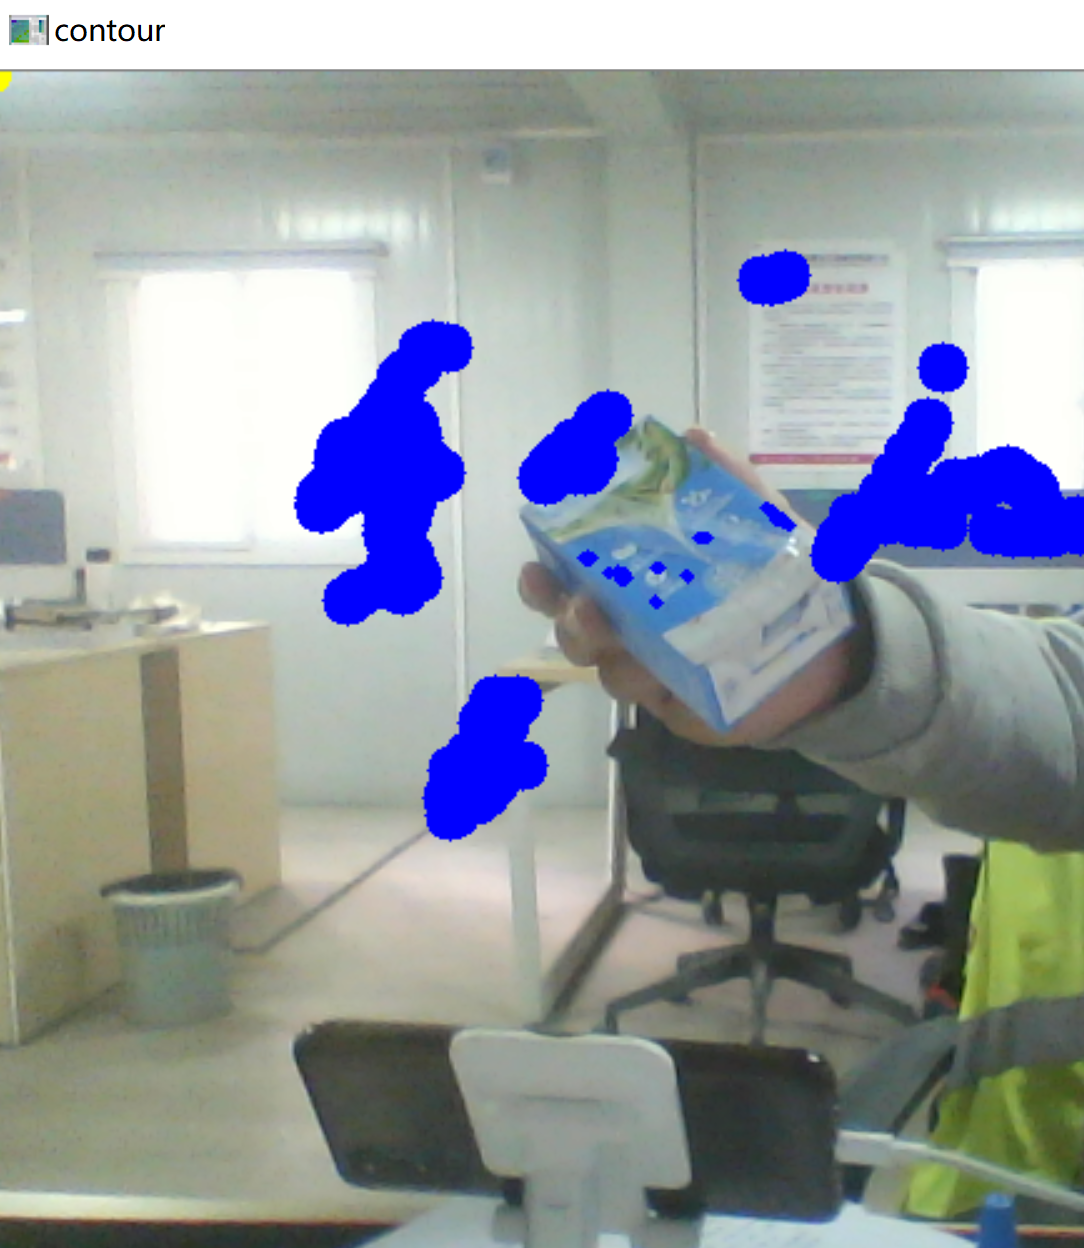